# 清理与分析数据 - WeRateDogs!
## 收集

In [1]:
# 导入需要的库
import numpy as np
import pandas as pd
import requests
import json
from bs4 import BeautifulSoup
import re

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
import IPython
import math

In [2]:
# 收集主要文件 twitter_archive_enhanced.csv 保存为 df_archive
df_archive = pd.read_csv('twitter-archive-enhanced.txt')
df_archive.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
343,832040443403784192,NaN,NaN,2017-02-16 01:34:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Klein. These pics were ...,7.699404e+17,4.196984e+09,2016-08-28 16:51:16 +0000,https://twitter.com/dog_rates/status/769940425...,12,10,Klein,None,None,None,None
1534,689993469801164801,NaN,NaN,2016-01-21 02:10:37 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a rare High Stepping Al...,NaN,NaN,NaN,https://vine.co/v/ienexVMZgi5,12,10,None,None,floofer,None,None


In [3]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
# 收集图像预测文件 image-predictions 保存为 image-predictions.tsv
url = "https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv','wb') as file:
    file.write(response.content)

# 读入.tsv文件并保存为数据集 df_image_pred
df_img_pred = pd.read_csv('image-predictions.tsv','\t',encoding = 'utf-8')
df_img_pred.sample(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
300,671488513339211776,https://pbs.twimg.com/media/CVGbPgrWIAAQ1fB.jpg,1,hermit_crab,0.528761,False,snail,0.185644,False,shower_curtain,0.066361,False


In [5]:
# 收集文件 3 保存为 dataframe
extra = []
with open('tweet_json.txt','r') as file:
    for line in file.readlines():
        extra.append(json.loads(line))
df_extra = pd.DataFrame(extra)
df_extra.sample(2)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
2048,None,None,Tue Dec 01 00:30:04 +0000 2015,"[0, 68]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 671486378568364032, 'id_str'...",617,False,This is Malcolm. He just saw a spider. 10/10 h...,None,...,False,NaN,NaN,NaN,225,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
205,None,None,Thu Apr 13 00:03:59 +0000 2017,"[0, 119]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 852311356040765442, 'id_str'...",35201,False,This is Wiggles. She would like you to spot he...,None,...,False,NaN,NaN,NaN,10906,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## 评估
### 目测评估

In [6]:
# 目测评估三个数据集
df_archive.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1073,739932936087216128,NaN,NaN,2016-06-06 21:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Rorie. She's zen af. Just enjoyin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739932936...,10,10,Rorie,None,None,None,None


In [7]:
df_extra.sample()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
315,None,None,Thu Feb 23 01:22:14 +0000 2017,"[0, 98]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 834574036302757888, 'id_str'...",14939,False,Here's a doggo fully pupared for a shower. H*c...,None,...,False,NaN,NaN,NaN,2868,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [8]:
df_img_pred.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
93,667549055577362432,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,1,electric_fan,0.984377,False,spotlight,0.007737,False,lampshade,0.001901,False


### 编程评估

In [9]:
# 使用 pandas 的各种方法评估三个数据集，比如 info value_counts 等
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
df_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2352 non-null object
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null object
id                               2352 non-null int64
id_str                           2352 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [11]:
df_img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
# 检查同一条twitter记录是否包含多张照片 
df_img_pred.tweet_id.duplicated().sum()

0

In [13]:
#检查评分是否有异常情况，检查分子和分母
df_archive.sort_values(by='rating_numerator', ascending = False)[['rating_numerator','rating_denominator']].head(10)

,rating_numerator,rating_denominator
979,1776,10
313,960,0
189,666,10
188,420,10
2074,420,10
1120,204,170
290,182,10
902,165,150
1779,144,120
1634,143,130


In [14]:
df_archive.sort_values(by='rating_denominator', ascending = True)[['rating_numerator','rating_denominator']].head(10)

,rating_numerator,rating_denominator
313,960,0
2335,1,2
516,24,7
1576,10,10
1575,11,10
1574,12,10
1573,7,10
1572,11,10
1563,10,10
1570,11,10


In [15]:
# 检查stage提取是否准确:重新从 text 中提取各个 stage，再与各个 stage列的情况相比较（原数据集中并未提取 blep和 snoot 两个stage)
stages = ['doggo','pupper','puppo','floofer']

for s in stages:   
    print(s, "-",(df_archive.text.str.lower().str.find(s)>-1).sum() - (df_archive[s] != 'None').sum())

doggo - 10
pupper - 26
puppo - 8
floofer - 0


### 评估结论

#### 质量 

##### `df_archive` 表格
- reply, retweet 相关列大部分为空值
- `name`列存在745个空值并且显示为None

- `timestamp` `retweeted_status_timestamp` 应为日期格式
- 各 id 列应为文本格式
- `source`可提取text并转换为category格式

- 2条异常评分：第313行的评分为 960/00, 第979行评分为1776/10
- 从`text`提取的`stage`不完整，并且没有狗狗被被标记为blep和snoot
- 存在一只狗狗有多个stage的情况

##### `df_extra` 表格
- 只包含2352条记录，比df_archive（2356条记录）少
- 多列包含大量空值
- `created_at`应为日期格式

##### `df_img_pred` 表格
- 只包含2075条记录，比df_archive少（2356条记录）
- `p1` `p2` `p3`各列大小写字母混用，并且词间连接符不规范（空格、下划线均有）

#### 整洁度
##### `df_archive` 表格
- 狗狗的Stage信息分成了多列来显示

##### `df_extra` 表格
- `entities` `extened_entities` `user`各列包含多个变量
- 可通过tweet_id合并至df_archive表中

##### `df_img_pred` 表格
- 可通过tweet_id合并至df_archive表中


## 清理

In [16]:
# 备份三个数据集
df_archive_clean = df_archive.copy()
df_extra_clean = df_extra.copy()
df_img_pred_clean = df_img_pred.copy()

In [17]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### 处理缺失值

##### 定义
- `in_reply`和`retweeted`空值有意义，不需要处理
- `expanded_urls`不参与本次分析，暂不处理

##### 代码

### 转换格式

##### 定义
将`timestamp` `retweeted_status_timestamp`转换为日期格式

##### 代码

In [18]:
# 使用 to_datetime 对日期相关列进行转换
df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp)
df_archive_clean.retweeted_status_timestamp = pd.to_datetime(df_archive_clean.retweeted_status_timestamp)

In [19]:
# 将各 id 列转换为文本格式
df_archive_clean[['retweeted_status_id','retweeted_status_user_id']]= df_archive_clean[['retweeted_status_id','retweeted_status_user_id']].astype(str)

In [20]:
# 处理 name 列，将"None"替换为空值NaN，首字母大写
df_archive_clean.name = df_archive_clean.name.replace('None',np.NaN).str.capitalize()

##### 测试

In [21]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime

### 提取Source

##### 定义
提取html代码中的文本，并转换为category格式

##### 代码

In [22]:
df_archive_clean.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [23]:
# 使用 BeautifulSoup 提取 <a> 标记
chr=[]
for i in df_archive_clean.source:
    chr.append(BeautifulSoup(i).a.text)

In [24]:
# 将提取的数值传递给 source 列，并转换为 category 格式
df_archive_clean['source']=chr
df_archive_clean['source']=df_archive_clean['source'].astype('category')

##### 测试

In [25]:
df_archive_clean.source.unique()

[Twitter for iPhone, Twitter Web Client, Vine - Make a Scene, TweetDeck]
Categories (4, object): [Twitter for iPhone, Twitter Web Client, Vine - Make a Scene, TweetDeck]

### 处理异常评分

##### 定义
根据tweet原文判断2条异常评分产生原因并作相应处理

##### 代码

In [26]:
# 检查记录313的推特原文，发现评分应取13/10，手动修正之
df_archive_clean.text[313]

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [27]:
df_archive_clean.rating_numerator[313]=13
df_archive_clean.rating_denominator[313]=10

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [28]:
# 检查记录979的推特原文，发现如此评分是意为之，不是数据错误
df_archive_clean.rating_numerator[979]

1776

##### 测试

In [29]:
df_archive_clean.sort_values(by='rating_numerator', ascending = False)[['rating_numerator','rating_denominator']].head(10)

,rating_numerator,rating_denominator
979,1776,10
189,666,10
188,420,10
2074,420,10
1120,204,170
290,182,10
902,165,150
1779,144,120
1634,143,130
1635,121,110


### 补充缺失的Stage数据

##### 定义
重新从tweet原文中提取stage数据

##### 代码

In [30]:
# 重新从 text 中提取 stage 到新变理 stages
stage = []
for t in df_archive_clean.text:
    stage.append(','.join(list(dict.fromkeys(re.findall('(doggo|pupper|puppo|floofer|blef|snoot)',t.lower().replace('floof','floofer'))))).replace("'',",""))

df_archive_clean['stages']=stage   

##### 测试

In [31]:
df_archive_clean['stages'].unique()

array(['', 'doggo', 'puppo', 'floofer', 'pupper', 'puppo,doggo',
       'doggo,floofer', 'pupper,doggo', 'doggo,pupper', 'floofer,pupper'],
      dtype=object)

### 检查包含多个stage的情况

In [32]:
for i in df_archive_clean[df_archive_clean.stages.str.len()>7].text:
    print(i,"\n")

I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq 

Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel 

At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk 

This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7 

Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho 

Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze 

This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine 

> 原文确实包含2个stage，并非提取错误

### 整理预测数据

##### 定义

##### 代码

In [33]:
df_img_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [34]:
# 只选取最有把握的 p1 参与分析
#df_img_pred_clean = df_img_pred_clean[['tweet_id','p1','p1_conf','p1_dog']]

In [35]:
# p1，p2，p3转换为小写字母，并替换下划线为空格
df_img_pred_clean[['p1','p2','p3']]=df_img_pred_clean[['p1','p2','p3']].apply(lambda x: x.str.lower().str.replace("_"," "))

In [36]:
df_img_pred_clean[['p1','p2','p3']].head()

,p1,p2,p3
0,welsh springer spaniel,collie,shetland sheepdog
1,redbone,miniature pinscher,rhodesian ridgeback
2,german shepherd,malinois,bloodhound
3,rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,rottweiler,doberman


##### 测试

### 合并3个表

##### 定义
使用 pd.merge 合并3个表
##### 代码

In [37]:
# 合并 df_archive 和 df_extra
df_merge = pd.merge(df_archive_clean,df_extra_clean,left_on='tweet_id',right_on='id',how='inner')

In [38]:
# 合并 df_archive 和 df_image_pred
df_merge = pd.merge(df_merge,df_img_pred_clean,on='tweet_id',how='left')

##### 测试

In [39]:
# 测试问题三是否正确清理完成
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2352 entries, 0 to 2351
Data columns (total 60 columns):
tweet_id                         2352 non-null int64
in_reply_to_status_id_x          78 non-null float64
in_reply_to_user_id_x            78 non-null float64
timestamp                        2352 non-null datetime64[ns]
source_x                         2352 non-null category
text                             2352 non-null object
retweeted_status_id              2352 non-null object
retweeted_status_user_id         2352 non-null object
retweeted_status_timestamp       177 non-null datetime64[ns]
expanded_urls                    2293 non-null object
rating_numerator                 2352 non-null int64
rating_denominator               2352 non-null int64
name                             1609 non-null object
doggo                            2352 non-null object
floofer                          2352 non-null object
pupper                           2352 non-null object
puppo            

In [40]:
# 筛选出需要分析的列
df_dogs=df_merge[["tweet_id", "timestamp", "source_x", "text", "rating_numerator", "rating_denominator", "name","stages", "favorite_count", "retweet_count", "jpg_url", "p1", "p1_conf", "p1_dog", "p2", "p2_conf", "p2_dog", "p3", "p3_conf", "p3_dog", 
]]
df_dogs.head()

,tweet_id,timestamp,source_x,text,rating_numerator,rating_denominator,name,stages,favorite_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,39492,8842,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,,33786,6480,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,25445,4301,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,,42863,8925,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,,41016,9721,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True


### 存储清理后的主数据集

In [41]:
# 将清理后的主数据集保存为 csv 文件或者 SQLite 数据库文件
df_dogs.to_csv('twitter-archive-enhanced-clean.csv')

## 分析和可视化

> 提示：
- 在 Notebook 使用 pandas 或 SQL 分析主数据集，并生成至少三（3）个独立的结论。
- 在 Notebook 中使用 Python 绘图库或在 Tableau 中至少生成一（1）个可视化图表。


### 观察到的时间相关性

In [42]:
# 分析或可视化代码
df_dogs.groupby('source_x').tweet_id.count()

source_x
TweetDeck                11
Twitter Web Client       33
Twitter for iPhone     2217
Vine - Make a Scene      91
Name: tweet_id, dtype: int64

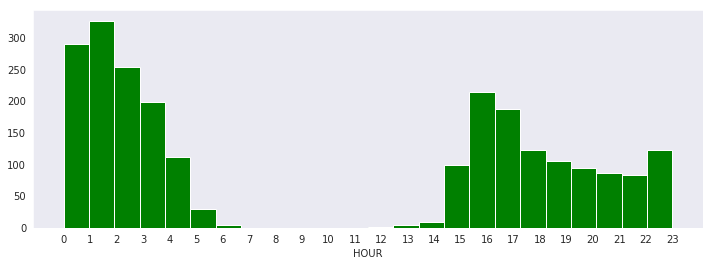

In [43]:
sns.set_style("dark")
#sns.distplot(df_dogs.timestamp.dt.hour,rug=False,kde=False,bins=24,axlabel='HOUR',color='g')

df_dogs.timestamp.dt.hour.hist(bins=24,figsize=(12,4),grid=False,color='g')
plt.xticks(np.arange(24))
plt.xlabel("HOUR");

与上面分析或可视化相关的见解或说明

> 分析显示数据集中tweet的量每天下午4点有个小高峰，23点后迅速上升，凌晨1点达到全天峰值(UTC时间)
但因为数据集中未找到有效的time zone信息(User中包含time zone项目，但值为None)，不清楚用户具体的使用偏好时段，猜测主要是由欧洲和美国两个地区用户叠加的结果

In [44]:
df_dogs_2016 = df_dogs.query('timestamp>"2016-1-1" & timestamp<"2017-1-1"')

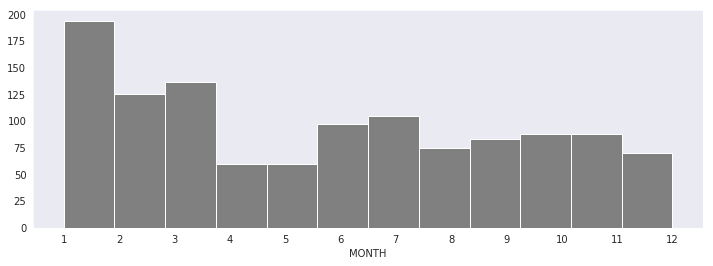

In [45]:
df_dogs_2016.timestamp.dt.month.hist(bins=12,figsize=(12,4),grid=False,color='grey')
plt.xticks(np.arange(1,13))
plt.xlabel("MONTH");

> 从月份上来看，各月差别不大，1月份有个小高峰

### 评分偏好

In [46]:
(df_dogs.rating_numerator/df_dogs.rating_denominator).sort_values(ascending=False).head(10)

975     177.600000
186      66.600000
185      42.000000
2070     42.000000
287      18.200000
692       7.500000
337       7.500000
513       3.428571
760       2.700000
1708      2.600000
dtype: float64

In [47]:
df_dogs.query('rating_numerator/rating_denominator>=1').shape[0]/df_dogs.shape[0]

0.8125

> 超过80%的用户都给狗狗打了100分以上（分子>分母），可见喜爱之情溢于言表

### 名字偏好

In [48]:
# 最受欢迎的名字
df_dogs.groupby('name').tweet_id.count().sort_values(ascending=False).head(10)

name
A          55
Charlie    12
Cooper     11
Oliver     11
Lucy       11
Tucker     10
Lola       10
Penny      10
Winston     9
Bo          9
Name: tweet_id, dtype: int64

> 出现最多的名字是 A ，但看起来不像狗狗的名字？不清楚名字信息是从哪里提取的，无法作进一步分析

### Tweet来源分布情况

In [49]:
df_dogs.groupby('source_x').tweet_id.count()

source_x
TweetDeck                11
Twitter Web Client       33
Twitter for iPhone     2217
Vine - Make a Scene      91
Name: tweet_id, dtype: int64

> 显示绝大部分来源于Twitter for iPhone，可见绝大部分用户使用手机刷Twitter，但不清楚为何没有Android来源的数据

### Favorite 和 Retweet 分析

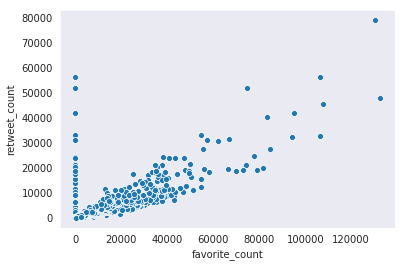

In [50]:
# 对两者作散点图
sns.scatterplot(df_dogs.favorite_count,df_dogs.retweet_count);

> 可观察到二者大体呈正相关, 但显然也有很多人直接转发而并未点点favorite favorite超过40000，或者retweet超过20000的tweet很少

### Stage分布情况

In [51]:
# 计算各个 stage 的出现次数
stages = ['doggo','pupper','puppo','floofer','blep','snoot']

stage_count=[]
for s in stages:
    stage_count.append((df_dogs.stages.str.find(s)>-1).sum())
stage_count

[107, 283, 38, 41, 0, 0]

In [52]:
# 计算包含 Stage 信息的记录的比例
df_dogs.query('stages!=""').tweet_id.count()/df_dogs.shape[0]

0.1917517006802721

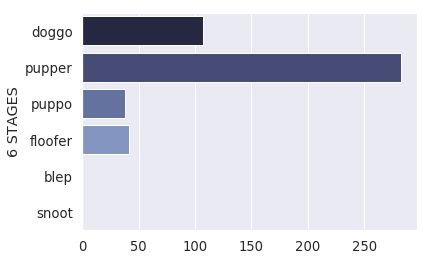

In [53]:
# 作 bar plot 演示各stage所占比例
sns.set(style="darkgrid",font_scale=1.2)
sns.barplot(stage_count,stages,orient='h',palette='ch:s=3,r=-.1,h=1_r')
plt.ylabel("6 STAGES");

> `pupper`分类显著多于其它分类，但总体来说只有少数tweet提供了stage标记（不足20%）

In [54]:
# 定义一个函数ImageMatrix用以显示图片方阵
def ImageMatrix(df_urls,vs=False):
    i=1
    fig = plt.figure(figsize=(12,12))
    rows = columns = math.ceil(math.sqrt(df_urls.shape[0]))
    size=300,300

    for url in df_urls.jpg_url:
        im = Image.open(requests.get(url, stream=True).raw)
        im.thumbnail(size)
        fig.add_subplot(rows, columns, i)
        plt.axis('off')
        if vs == True:
            plt.title(df_urls.p1.reset_index(drop=True)[i-1] + '\n' + df_urls.p2.reset_index(drop=True)[i-1])
            plt.subplots_adjust(hspace=.4)
        plt.imshow(im)
        i+=1

    plt.show()

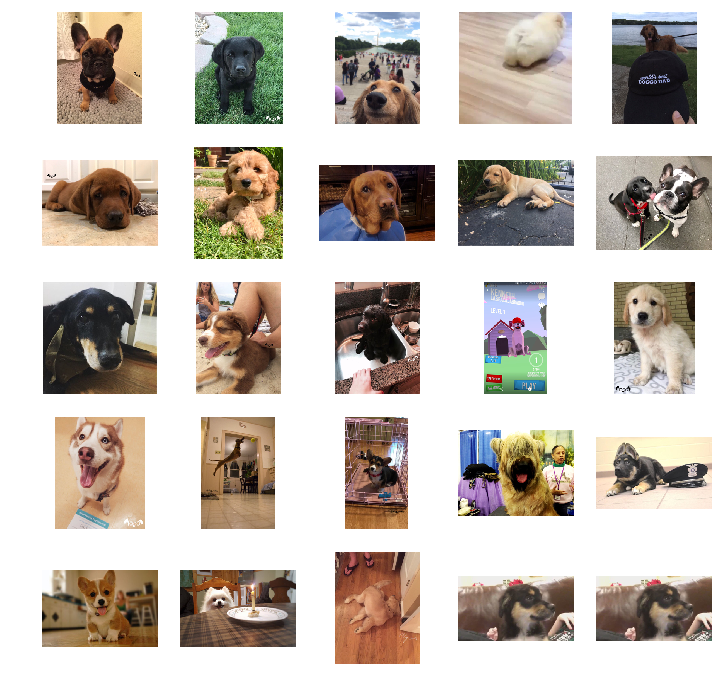

In [81]:
ImageMatrix(df_dogs.query('stages == "pupper"').dropna(subset=['jpg_url']).head(25));

### 狗狗品种预测情况

In [57]:
# 提取新数据集，只分析有预测值的记录
df_dogs_valid = df_dogs.dropna(subset=['p1'])

In [58]:
# 查看多少狗狗被 AI 认为不是狗
df_dogs_valid.groupby('p1_dog').p1_dog.count()

p1_dog
False     542
True     1531
Name: p1_dog, dtype: int64

In [59]:
# 最受欢迎的犬种 TOP 10
df_dogs_valid.query('p1_dog == True').groupby('p1').p1.count().sort_values(ascending=False).head(10)

p1
golden retriever      150
labrador retriever    100
pembroke               88
chihuahua              83
pug                    57
chow                   44
samoyed                43
toy poodle             39
pomeranian             38
cocker spaniel         30
Name: p1, dtype: int64

In [60]:
# 被 AI 判熂为不是狗的物体 TOP 10
df_dogs_valid.query('p1_dog == False').groupby('p1').p1.count().sort_values(ascending=False).head(10)

p1
seat belt      22
web site       19
teddy          18
tennis ball     9
dingo           9
doormat         8
bath towel      7
tub             7
swing           7
hamster         7
Name: p1, dtype: int64

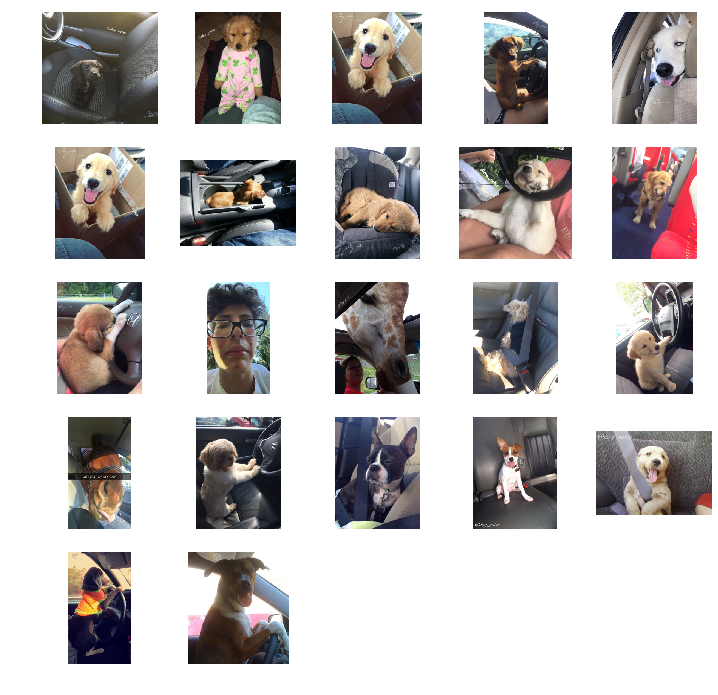

In [61]:
# 显示被误认为 seat_belt 的图片
ImageMatrix(df_dogs_valid.query('p1=="seat belt"'))

> 可以看出这些图片大都是在车里的狗狗，有几只甚至都没有系安全带

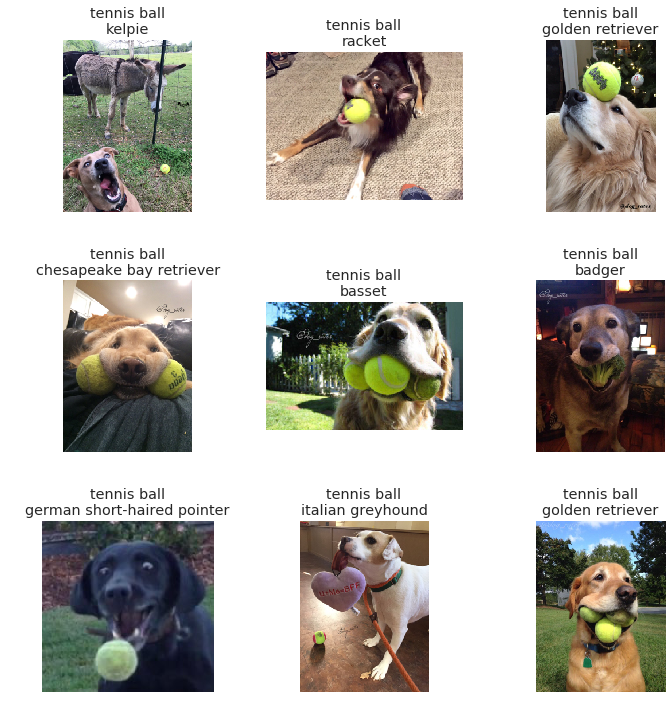

In [62]:
# 显示被误认为 tennis_ball 的图片
ImageMatrix(df_dogs_valid.query('p1=="tennis ball"'),vs=True)

> 这些图片里都有网球。可以看到有些图片里网球的影像其实很小，而狗狗的占了绝大多数画面，但算法仍认为它是网球

In [63]:
# 统计 p1、p2 两次预测对 “是不是狗“ 左右为难的记录
df_dogs_valid['p1_p2'] = df_dogs_valid.p1_conf - df_dogs_valid.p2_conf
df_dogs_valid.query('p1_dog != p2_dog').sort_values('p1_p2').head()[['p1_dog','p2_dog','p1_p2']]

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,p1_dog,p2_dog,p1_p2
1824,False,True,0.000253
3,False,True,0.002192
2097,True,False,0.002727
1312,False,True,0.004943
2236,True,False,0.005071


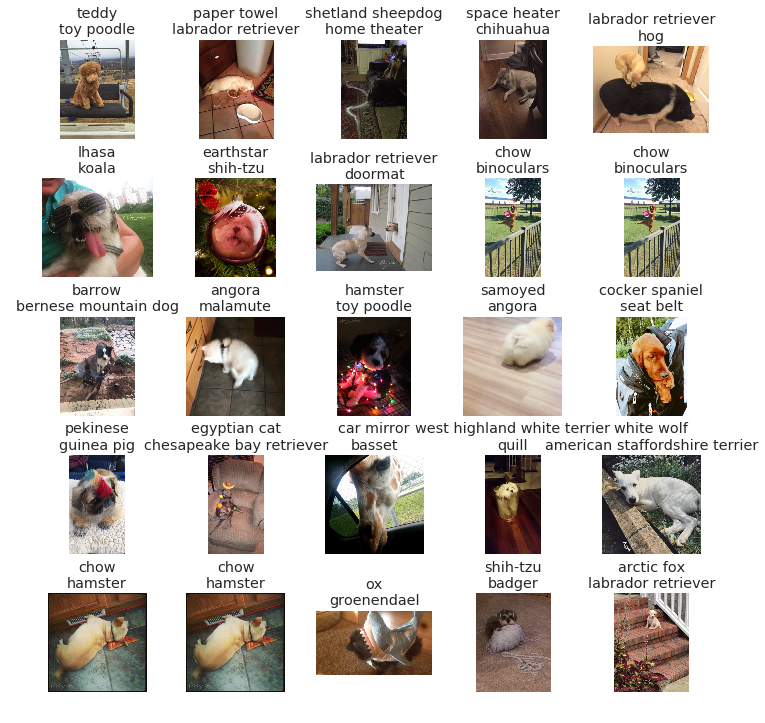

In [64]:
# 显示这些图片
ImageMatrix(df_dogs_valid.query('p1_dog != p2_dog').sort_values('p1_p2').head(25),vs=True)

> 可以看出有一些情况是因为狗狗占画面比例太小（比如同一张图里出现狗和猪），或者确实难以分辨（比如玩具贵宾和泰迪熊），但似乎看不出太多规律

## 参考
- https://github.com/jfwalkenford/Wrangle-Act/
- https://stackoverflow.com/questions/46615554/how-to-display-multiple-images-in-one-figure-correctly/46616645

> 更多说明
- 数据整理过程描述文件 [`wrangle_report.pdf`](./wrangle_report.pdf)
- 数据分析和可视化描述文件 [`act_report.pdf`](./act_report.pdf)